In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:

# import data
store_data = pd.read_csv('QVI_data.csv')

In [5]:

# inspect data
store_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
# describe data
store_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [7]:
# SELECT CONTROL STORES
# Note our target metrics to identify stores:
# - month overal sales rev
# - month num customer
# - month num transactions per customer

# Trials were performed in stores 77, 86, 88


In [8]:
# metric 1: monthly overall sales revenue by store
store_data['month_year'] = pd.to_datetime(store_data['DATE']).dt.to_period('M')
store_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_year
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [9]:
# before selecting data before trial period create copy of dataframe for later use
store_data_orig = store_data.copy()

# The trial period goes from the start of February 2019 to April 2019
# select data before trial period  as per the brief
store_data = store_data[(store_data['month_year'] != '2019-02') & (store_data['month_year'] != '2019-03') & (store_data['month_year'] != '2019-04')]

In [10]:
# monthly overall sales revenue by store
mon_sal_rev = store_data.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
mon_sal_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-07,1,206.9
1,2018-07,2,150.8
2,2018-07,3,1205.7
3,2018-07,4,1399.9
4,2018-07,5,812.0


In [11]:
# monthly num customers by store
mon_num_cust = store_data.groupby(['month_year', 'STORE_NBR'])['LYLTY_CARD_NBR'].count().reset_index()
mon_num_cust.head()

,month_year,STORE_NBR,LYLTY_CARD_NBR
0,2018-07,1,52
1,2018-07,2,41
2,2018-07,3,138
3,2018-07,4,160
4,2018-07,5,120


In [12]:
# monthly num transactions by customer
mon_num_tra = store_data.groupby(['month_year', 'LYLTY_CARD_NBR'])['TXN_ID'].count().reset_index()
mon_num_tra.head()

,month_year,LYLTY_CARD_NBR,TXN_ID
0,2018-07,1011,1
1,2018-07,1027,1
2,2018-07,1042,1
3,2018-07,1055,1
4,2018-07,1057,1


In [13]:
# we will select trial stores by using the correlation variables
# join relevant dataframes together 
df_concat = pd.concat([mon_sal_rev, mon_num_cust], axis=1)

# drop duplicate columns
df_concat = df_concat.loc[:,~df_concat.columns.duplicated()]

# rename LYLTY_CARD_NBR to cust_cnt
df_concat.rename(columns = {'LYLTY_CARD_NBR':'cust_cnt'}, inplace=True)

df_concat.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-07,1,206.9,52
1,2018-07,2,150.8,41
2,2018-07,3,1205.7,138
3,2018-07,4,1399.9,160
4,2018-07,5,812.0,120


In [14]:
# before normalising create a copy of the dataset for later use
df_base = df_concat.copy()

# normalise tot sales column
df_concat['TOT_SALES'] = df_concat['TOT_SALES']/df_concat['TOT_SALES'].max()

# normalise cust_cnt column
df_concat['cust_cnt'] = df_concat['cust_cnt']/df_concat['cust_cnt'].max()

# # find values for control stores
df_77 = df_concat[df_concat['STORE_NBR']==77]
df_86 = df_concat[df_concat['STORE_NBR']==86]
df_88 = df_concat[df_concat['STORE_NBR']==88]

# drop control stores
av_df_new = df_concat[(df_concat['STORE_NBR'] != 77) & (df_concat['STORE_NBR'] != 86) & (df_concat['STORE_NBR'] != 88)]

av_df_new.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-07,1,0.124669,0.275132
1,2018-07,2,0.090865,0.216931
2,2018-07,3,0.726500,0.730159
3,2018-07,4,0.843517,0.846561
4,2018-07,5,0.489275,0.634921


In [15]:
# merge values into dataframe (appends the values for each control store by month as columns in dataframe)
# calculate difference between total sales and customer count for each row compared to that for store 77
df2 = pd.merge(av_df_new, df_77, on='month_year')

df2.rename(columns = {'STORE_NBR_y':'STORE_NBR_77', 'TOT_SALES_y': 'TOT_SALES_77', 'cust_cnt_y': 'cust_cnt_77'}, inplace=True)

df2.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77
0,2018-07,1,0.124669,0.275132,77,0.178838,0.291005
1,2018-07,2,0.090865,0.216931,77,0.178838,0.291005
2,2018-07,3,0.726500,0.730159,77,0.178838,0.291005
3,2018-07,4,0.843517,0.846561,77,0.178838,0.291005
4,2018-07,5,0.489275,0.634921,77,0.178838,0.291005


In [16]:
df3 = pd.merge(df2, df_86, on = 'month_year')

df3.rename(columns = {'STORE_NBR':'STORE_NBR_86', 'TOT_SALES': 'TOT_SALES_86', 'cust_cnt': 'cust_cnt_86'}, inplace=True)

df3.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86
0,2018-07,1,0.124669,0.275132,77,0.178838,0.291005,86,0.537599,0.666667
1,2018-07,2,0.090865,0.216931,77,0.178838,0.291005,86,0.537599,0.666667
2,2018-07,3,0.726500,0.730159,77,0.178838,0.291005,86,0.537599,0.666667
3,2018-07,4,0.843517,0.846561,77,0.178838,0.291005,86,0.537599,0.666667
4,2018-07,5,0.489275,0.634921,77,0.178838,0.291005,86,0.537599,0.666667


In [17]:
df4 = pd.merge(df3, df_88, on = 'month_year')

df4.rename(columns = {'STORE_NBR':'STORE_NBR_88', 'TOT_SALES': 'TOT_SALES_88', 'cust_cnt': 'cust_cnt_88'}, inplace=True)

df4.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86,STORE_NBR_88,TOT_SALES_88,cust_cnt_88
0,2018-07,1,0.124669,0.275132,77,0.178838,0.291005,86,0.537599,0.666667,88,0.789347,0.809524
1,2018-07,2,0.090865,0.216931,77,0.178838,0.291005,86,0.537599,0.666667,88,0.789347,0.809524
2,2018-07,3,0.726500,0.730159,77,0.178838,0.291005,86,0.537599,0.666667,88,0.789347,0.809524
3,2018-07,4,0.843517,0.846561,77,0.178838,0.291005,86,0.537599,0.666667,88,0.789347,0.809524
4,2018-07,5,0.489275,0.634921,77,0.178838,0.291005,86,0.537599,0.666667,88,0.789347,0.809524


In [18]:
# find difference between normalised variables and add as columns to dataframe

df4['dts_77'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_77'])
df4['dc_77'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_77'])
df4['dav_77'] = df4[['dts_77','dc_77']].mean(axis=1)

df4['dts_86'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_86'])
df4['dc_86'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_86'])
df4['dav_86'] = df4[['dts_86','dc_86']].mean(axis=1)

df4['dts_88'] = abs(df4['TOT_SALES_x'] - df4['TOT_SALES_88'])
df4['dc_88'] = abs(df4['cust_cnt_x'] - df4['cust_cnt_88'])
df4['dav_88'] = df4[['dts_88','dc_88']].mean(axis=1)

df4.head()

,month_year,STORE_NBR_x,TOT_SALES_x,cust_cnt_x,STORE_NBR_77,TOT_SALES_77,cust_cnt_77,STORE_NBR_86,TOT_SALES_86,cust_cnt_86,...,cust_cnt_88,dts_77,dc_77,dav_77,dts_86,dc_86,dav_86,dts_88,dc_88,dav_88
0,2018-07,1,0.124669,0.275132,77,0.178838,0.291005,86,0.537599,0.666667,...,0.809524,0.054170,0.015873,0.035021,0.412931,0.391534,0.402233,0.664678,0.534392,0.599535
1,2018-07,2,0.090865,0.216931,77,0.178838,0.291005,86,0.537599,0.666667,...,0.809524,0.087973,0.074074,0.081024,0.446734,0.449735,0.448235,0.698482,0.592593,0.645537
2,2018-07,3,0.726500,0.730159,77,0.178838,0.291005,86,0.537599,0.666667,...,0.809524,0.547662,0.439153,0.493408,0.188901,0.063492,0.126197,0.062846,0.079365,0.071106
3,2018-07,4,0.843517,0.846561,77,0.178838,0.291005,86,0.537599,0.666667,...,0.809524,0.664678,0.555556,0.610117,0.305917,0.179894,0.242906,0.054170,0.037037,0.045603
4,2018-07,5,0.489275,0.634921,77,0.178838,0.291005,86,0.537599,0.666667,...,0.809524,0.310436,0.343915,0.327176,0.048325,0.031746,0.040035,0.300072,0.174603,0.237338


In [19]:
# use groupby to create new dataframes which calculate mean distance from trial stores over observation period

dfn_77 = df4.groupby(['STORE_NBR_x'])['dav_77'].mean().reset_index()
dfn_86 = df4.groupby(['STORE_NBR_x'])['dav_86'].mean().reset_index()
dfn_88 = df4.groupby(['STORE_NBR_x'])['dav_88'].mean().reset_index()

In [20]:
# print control stores

ctrl_77 = dfn_77[dfn_77['dav_77'] == dfn_77['dav_77'].min()].STORE_NBR_x.iloc[0]
ctrl_86 = dfn_86[dfn_86['dav_86'] == dfn_86['dav_86'].min()].STORE_NBR_x.iloc[0]
ctrl_88 = dfn_88[dfn_88['dav_88'] == dfn_88['dav_88'].min()].STORE_NBR_x.iloc[0]

print('control for store 77 =', ctrl_77)
print('control for store 86 =', ctrl_86)
print('control for store 88 =', ctrl_88)

control for store 77 = 233
control for store 86 = 155
control for store 88 = 237


In [21]:
# inspect data for trial store and control store
print(df_base[df_base['STORE_NBR']==77], '\n')
print(df_base[df_base['STORE_NBR']==ctrl_77], '\n')

     month_year  STORE_NBR  TOT_SALES  cust_cnt
73      2018-07         77      296.8        55
338     2018-08         77      255.5        48
603     2018-09         77      225.2        44
868     2018-10         77      204.5        38
1132    2018-11         77      245.3        44
1396    2018-12         77      267.3        49
1658    2019-01         77      204.4        39
1921    2019-05         77      299.3        56
2184    2019-06         77      264.7        42 

     month_year  STORE_NBR  TOT_SALES  cust_cnt
227     2018-07        233      290.7        54
489     2018-08        233      285.9        50
754     2018-09        233      228.6        45
1019    2018-10        233      185.7        36
1283    2018-11        233      211.6        41
1546    2018-12        233      279.8        50
1809    2019-01        233      177.5        35
2072    2019-05        233      344.4        62
2336    2019-06        233      221.0        41 



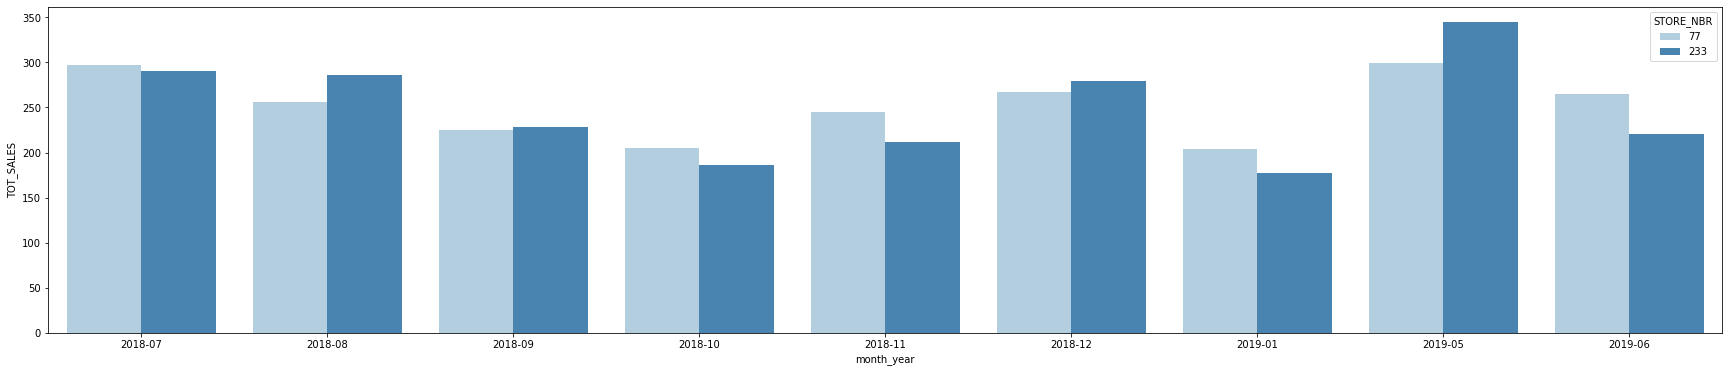

In [22]:
# plot TOT_SALES by month for each store 77
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

# figure shows that tot sales is similar for trial and selected control store each month so selected control store is very good

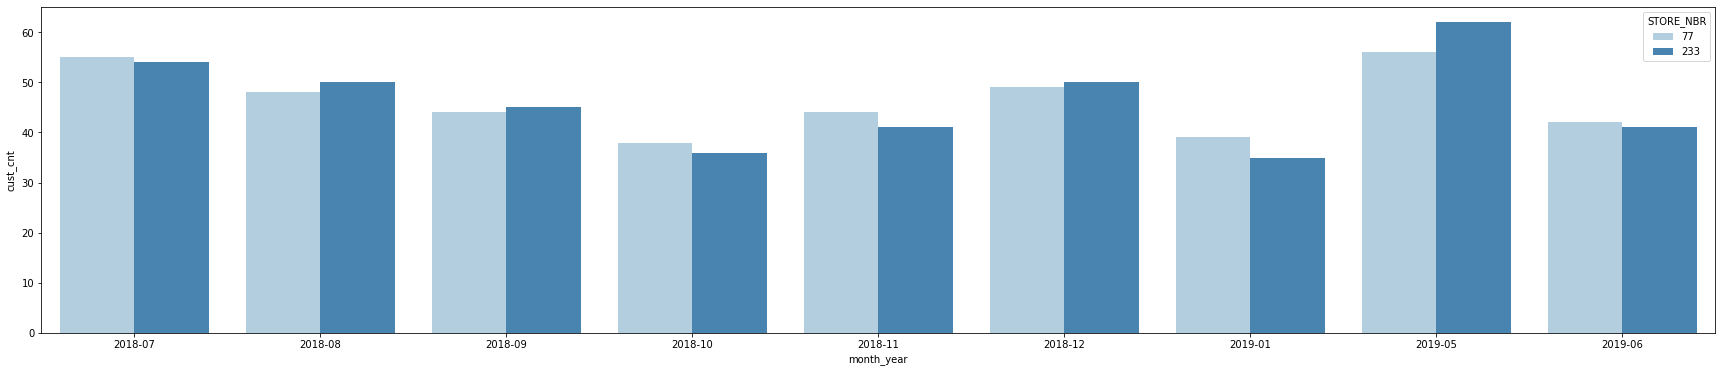

In [23]:
# plot cust_cnt by month for each store 77
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([77, ctrl_77])], palette='Blues')

# figure shows that customer count is similar for trial and selected control store month so selected control store is very good
# I can therefore assume my analysis is accurate and can be relied upon

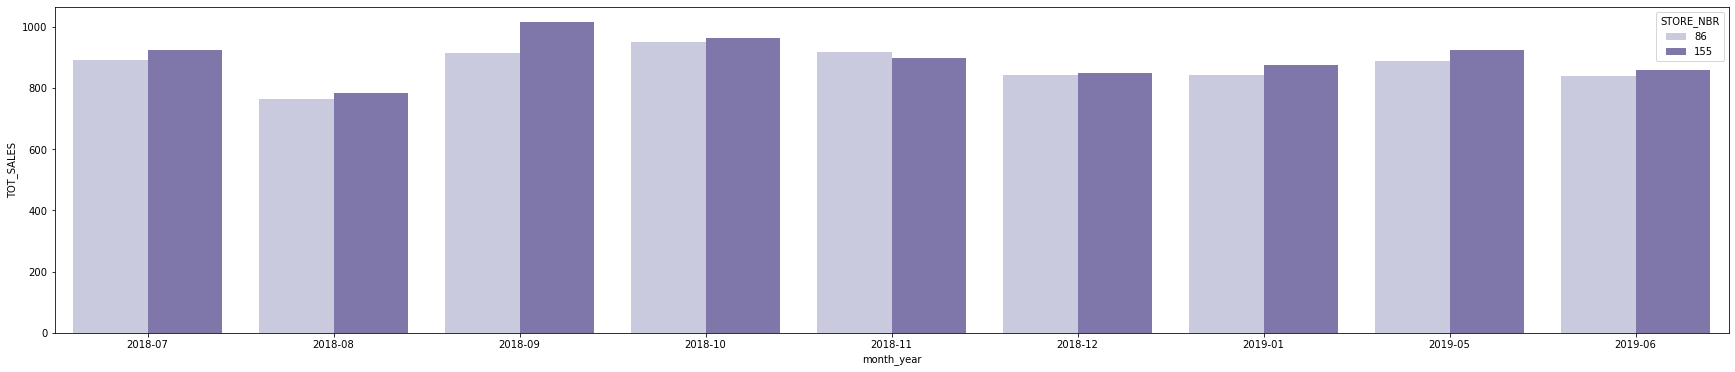

In [24]:
# plot TOT_SALES by month for each store 86
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')

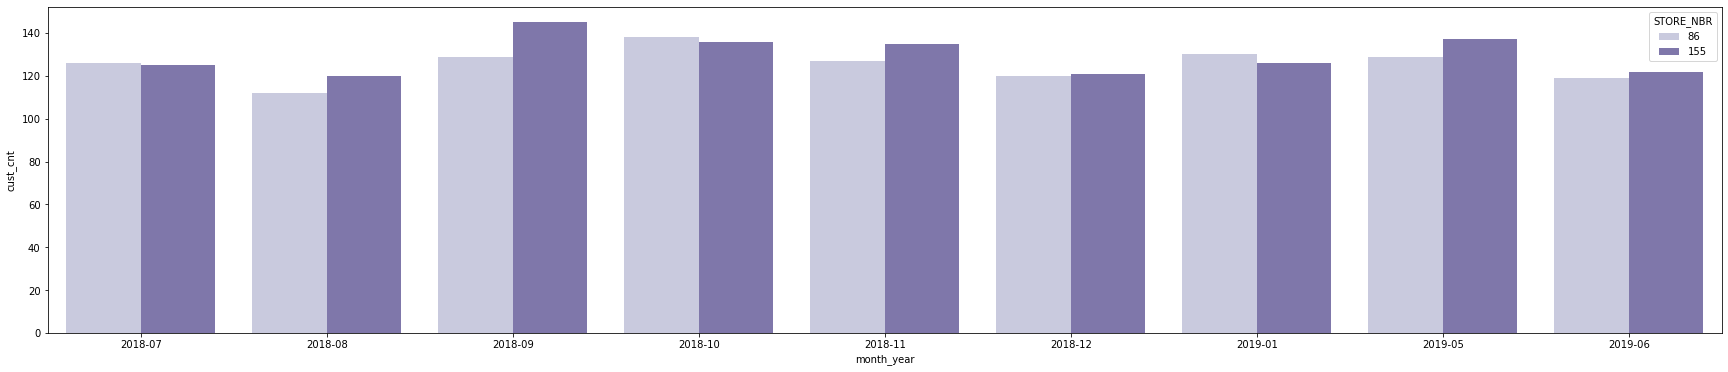

In [25]:
# plot cust_cnt by month for each store 86
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([86, ctrl_86])], palette='Purples')

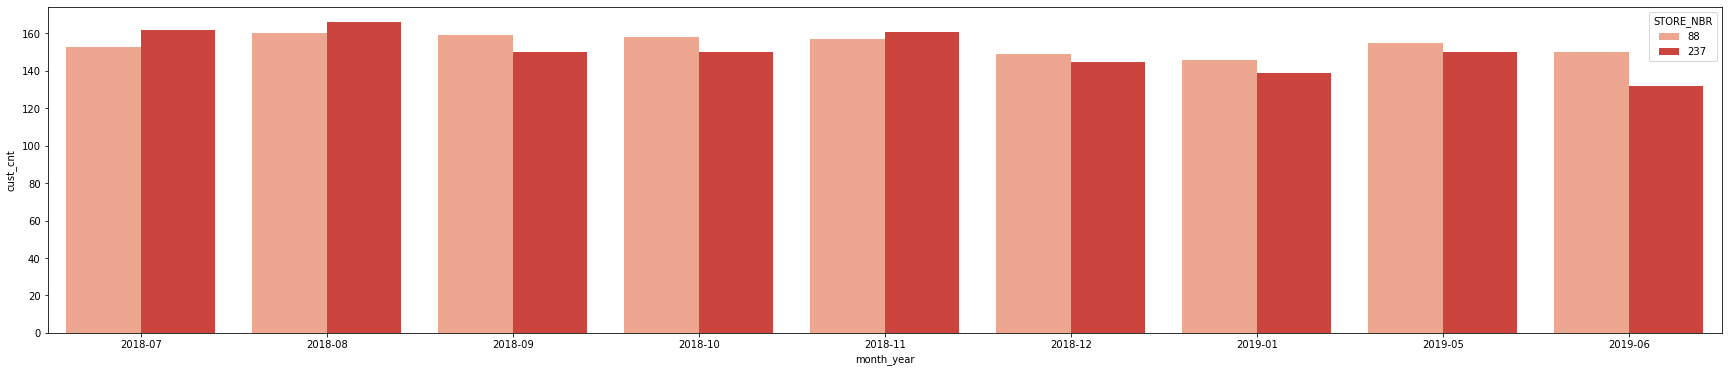

In [26]:
# plot TOT_SALES by month for each store 88
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([88, ctrl_88])], palette = 'Reds')

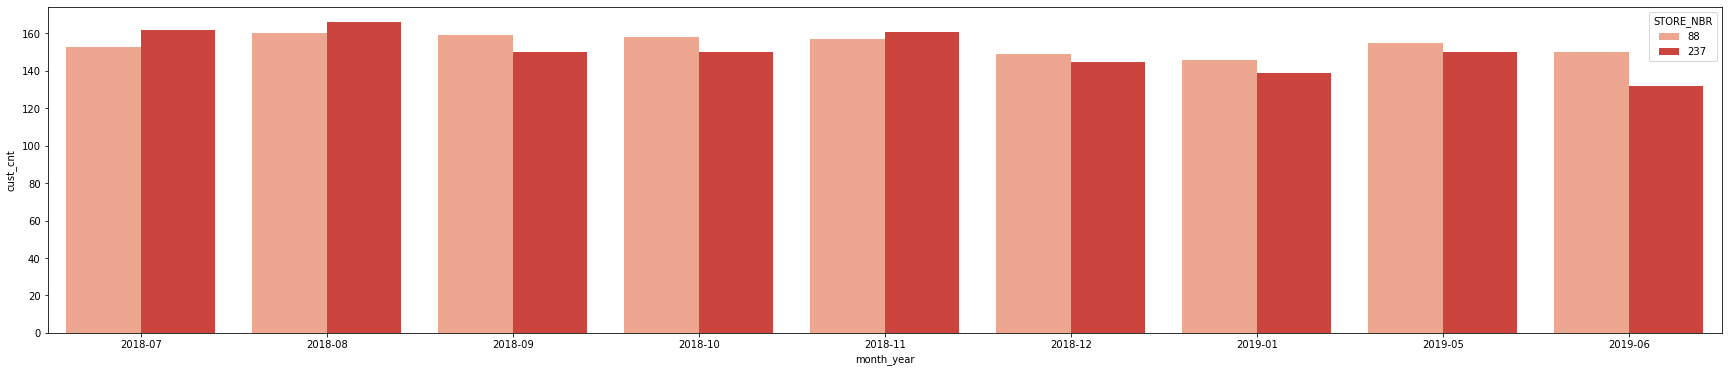

In [27]:
# plot cust_cnt by month for each store 88
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = df_base[df_base['STORE_NBR'].isin([88, ctrl_88])], palette='Reds')

In [28]:
# Part 2 of Stage 2 of Quantium VI
# create new dataframe containing original, raw data for trial stores and control stores
ct_tr = store_data_orig[store_data_orig['STORE_NBR'].isin([77,ctrl_77,86,ctrl_86, 88, ctrl_88])] 
ct_tr.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_year
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,2019-03
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2019-04
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2018-09
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2019-02
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,2019-01


In [29]:
# add month_year to dataframe
ct_tr['month_year'] = pd.to_datetime(ct_tr['DATE']).dt.to_period('M')

<ipython-input-29-ebe814d8aa4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_tr['month_year'] = pd.to_datetime(ct_tr['DATE']).dt.to_period('M')


In [30]:
# monthly overall sales revenue by store
sls_rev = ct_tr.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
sls_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-07,77,296.8
1,2018-07,86,892.2
2,2018-07,88,1310.0
3,2018-07,155,924.6
4,2018-07,233,290.7


In [31]:
# calc store sales and cust count for stores over full obersvation period
num_cst = ct_tr.groupby(['month_year', 'STORE_NBR'])['LYLTY_CARD_NBR'].count().reset_index()
num_cst.head(100)

,month_year,STORE_NBR,LYLTY_CARD_NBR
0,2018-07,77,55
1,2018-07,86,126
2,2018-07,88,153
3,2018-07,155,125
4,2018-07,233,54
...,...,...,...
67,2019-06,86,119
68,2019-06,88,150
69,2019-06,155,122
70,2019-06,233,41


In [32]:
# join relevant dataframes together 
ct_tr_new = pd.concat([sls_rev, num_cst], axis=1)

# drop duplicate columns
ct_tr_new = ct_tr_new.loc[:,~ct_tr_new.columns.duplicated()]

# rename LYLTY_CARD_NBR to cust_cnt
ct_tr_new.rename(columns = {'LYLTY_CARD_NBR':'cust_cnt'}, inplace=True)

ct_tr_new.head()

,month_year,STORE_NBR,TOT_SALES,cust_cnt
0,2018-07,77,296.8,55
1,2018-07,86,892.2,126
2,2018-07,88,1310.0,153
3,2018-07,155,924.6,125
4,2018-07,233,290.7,54


In [33]:
# select data during trial periods
# The trial period goes from the start of February 2019 to April 2019
start_date = '2019-02'
end_date = '2019-04'

tr_df = ct_tr_new[(ct_tr_new['month_year'] >= start_date) & (ct_tr_new['month_year'] <= end_date)]
tr_df.head(100)

,month_year,STORE_NBR,TOT_SALES,cust_cnt
42,2019-02,77,235.0,45
43,2019-02,86,913.2,139
44,2019-02,88,1370.2,154
45,2019-02,155,891.2,127
46,2019-02,233,244.0,47
47,2019-02,237,1404.8,157
48,2019-03,77,278.5,55
49,2019-03,86,1026.8,142
50,2019-03,88,1477.2,170
51,2019-03,155,804.4,120


In [34]:
# normalise tot_sales column
tr_df['TOT_SALES'] = tr_df['TOT_SALES']/tr_df['TOT_SALES'].max()

# normalise cust_cnt column
tr_df['cust_cnt'] = tr_df['cust_cnt']/tr_df['cust_cnt'].max()

<ipython-input-34-bdc0cb153d6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['TOT_SALES'] = tr_df['TOT_SALES']/tr_df['TOT_SALES'].max()
<ipython-input-34-bdc0cb153d6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df['cust_cnt'] = tr_df['cust_cnt']/tr_df['cust_cnt'].max()


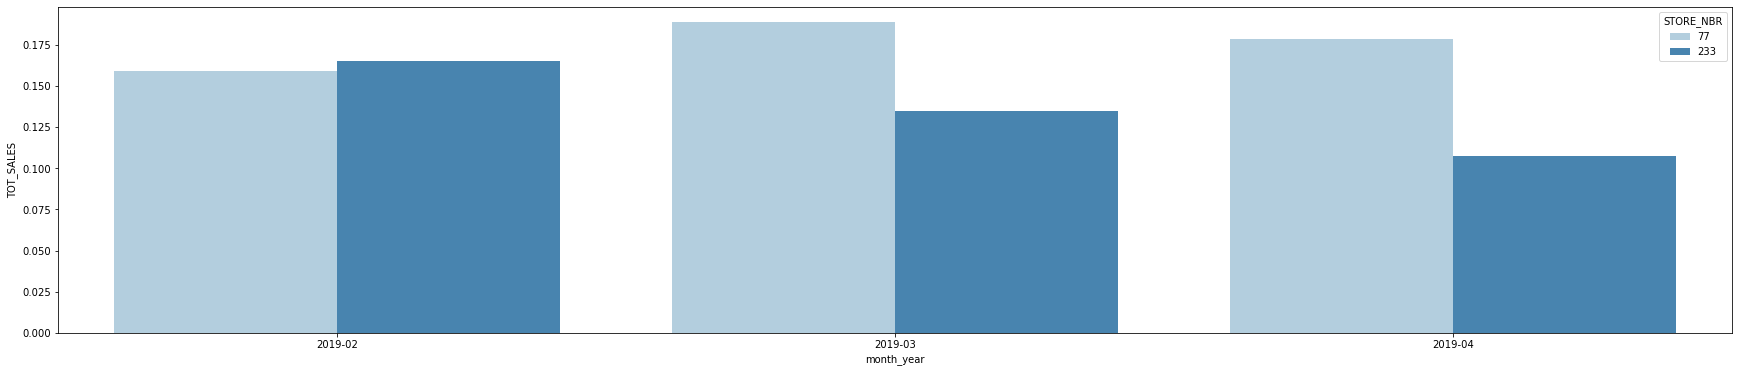

In [35]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

# fig shows higher sales in

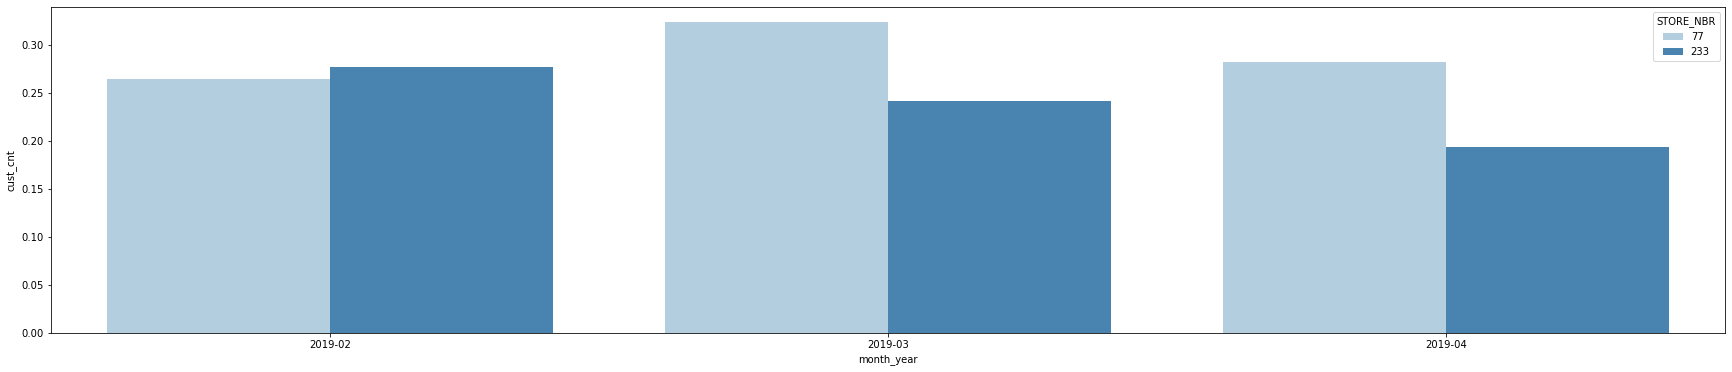

In [36]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([77, ctrl_77])], palette = 'Blues')

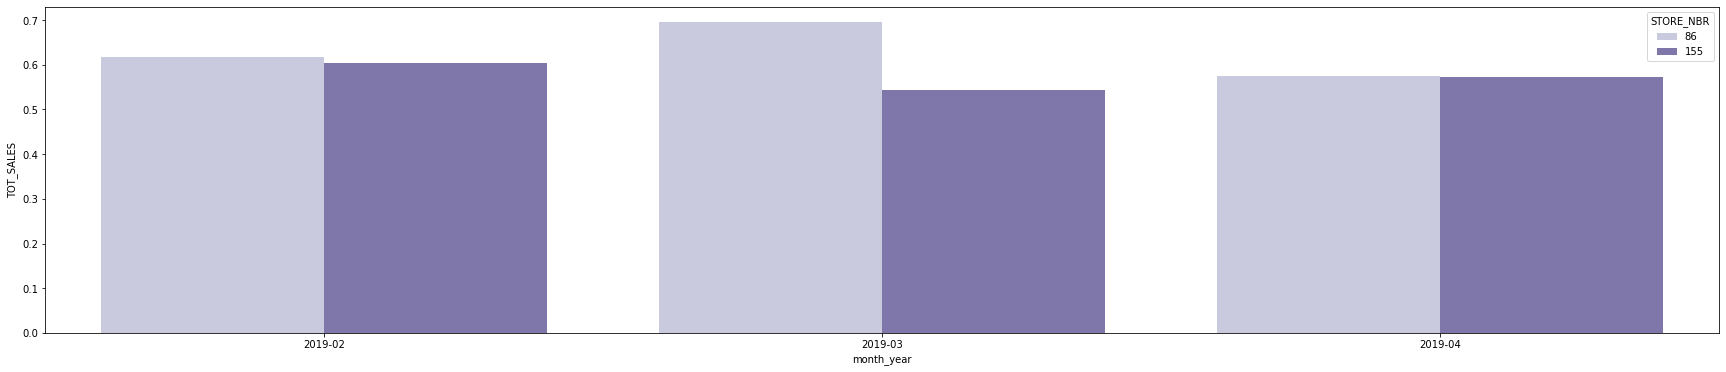

In [37]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')

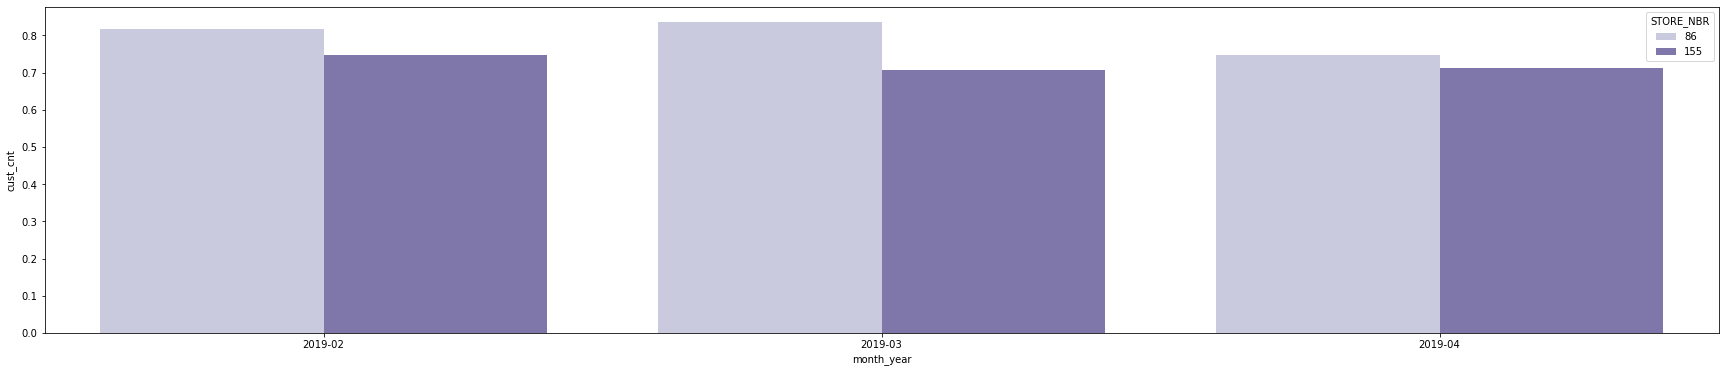

In [38]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([86, ctrl_86])], palette = 'Purples')

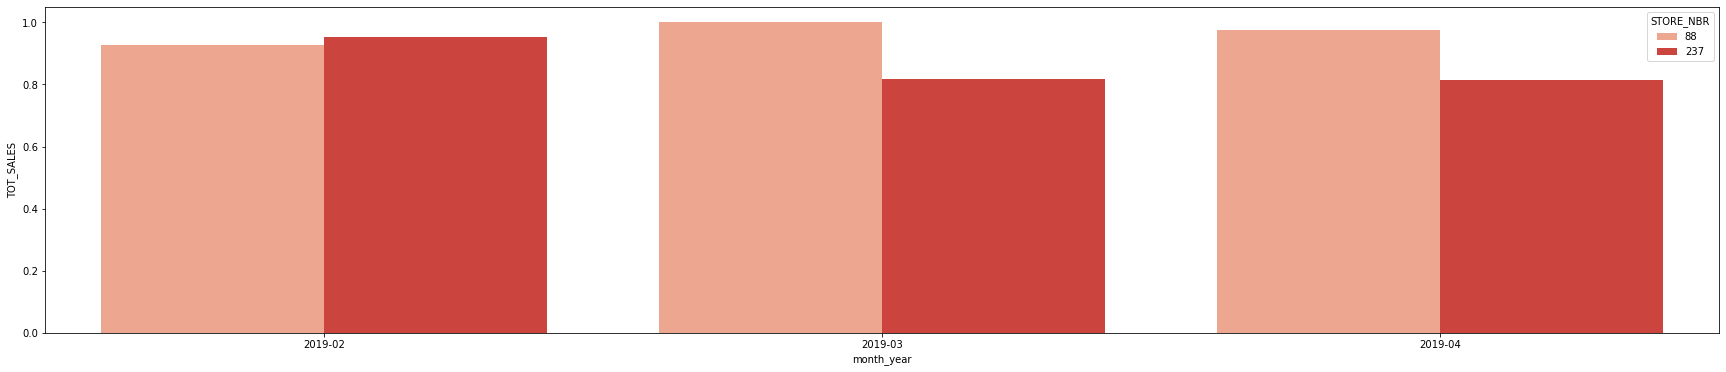

In [39]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([88, ctrl_88])], palette = 'Reds')

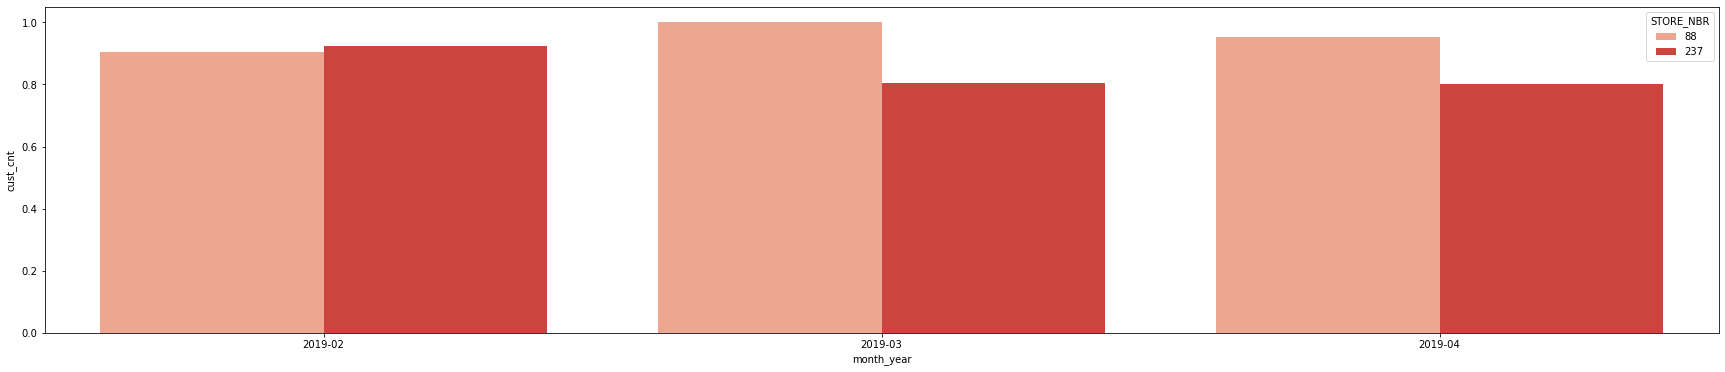

In [40]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'month_year', y='cust_cnt', hue = 'STORE_NBR', data = tr_df[tr_df['STORE_NBR'].isin([88, ctrl_88])], palette='Reds')

In [41]:
# create dataframe for plot
tr_plot = tr_df.groupby(['STORE_NBR'])['TOT_SALES'].sum().reset_index()

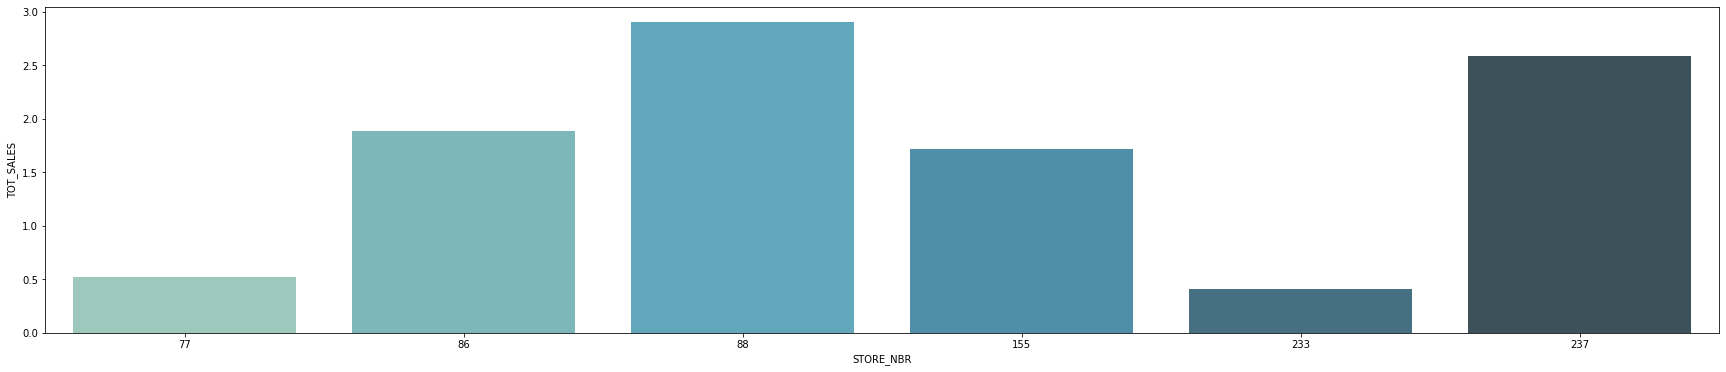

In [42]:
# plot data to visualise impact of trial 
plt.figure(figsize=(30,6))
ax = sns.barplot(x = 'STORE_NBR', y='TOT_SALES', data = tr_plot, palette="GnBu_d")

# plot suggests that trial increased tot_sales in store 88, but sales reduced in 77 and 101

In [43]:
# check against own category data
# add month_year
store_data_orig['month_year'] = pd.to_datetime(store_data_orig['DATE']).dt.to_period('M')

# sum sales
orig_sal_rev = store_data_orig.groupby(['month_year', 'STORE_NBR'])['TOT_SALES'].sum().reset_index()
orig_sal_rev.head()

,month_year,STORE_NBR,TOT_SALES
0,2018-07,1,206.9
1,2018-07,2,150.8
2,2018-07,3,1205.7
3,2018-07,4,1399.9
4,2018-07,5,812.0


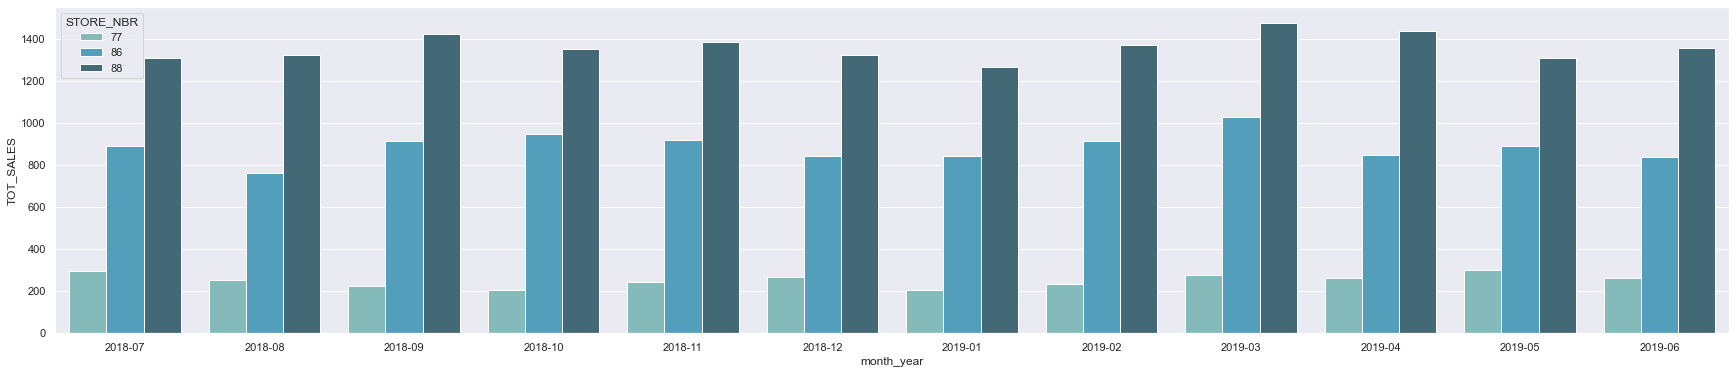

In [44]:
# plot original data over full observtion period
sns.set(style='darkgrid')
plt.figure(figsize=(30,6))

ax = sns.barplot(x = 'month_year', y='TOT_SALES', hue = 'STORE_NBR', data = orig_sal_rev[orig_sal_rev['STORE_NBR'].isin([77, 86, 88])], palette = 'GnBu_d')

In [45]:
# conclusions

# store 77
# sales are lower than control store during the trial period
# sales are higher during trial period than rest of year

# store 86
# sales are lower than control store during the trial period
# sales are higher during trial period than rest of year

# store 88
# sales are higher than control store during the trial period
# sales are higher during trial period than rest of year